In [1]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  4 2020, 00:03:40) [MSC v.1916 32 bit (Intel)]
Scipy: 1.5.2
Numpy: 1.19.2
Matplotlib: 3.3.1
Pandas: 1.1.3
Sklearn: 0.23.1


In [2]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection 
from sklearn.ensemble import VotingClassifier

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Class']
dataset = read_csv(url, names = names)

In [4]:
#dimensions of the dataset
print(dataset.shape)

(150, 5)


In [5]:
#take a peak at the data
print(dataset.head(30))

    Sepal-Length  Sepal-Width  Petal-Length  Petal-Width        Class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [9]:
# statistical summary
print(dataset.describe())

       Sepal-Length  Sepal-Width  Petal-Length  Petal-Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
# class distribution 
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


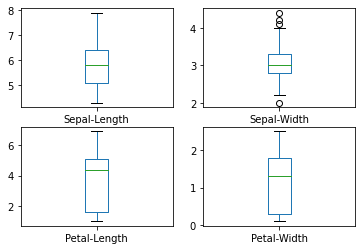

In [12]:
#univariate plots - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

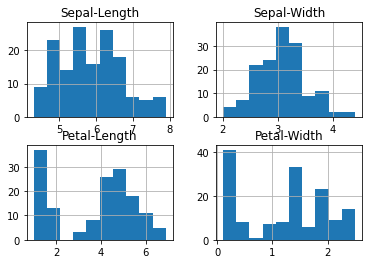

In [14]:
# histogram of the variable
dataset.hist()
pyplot.show()


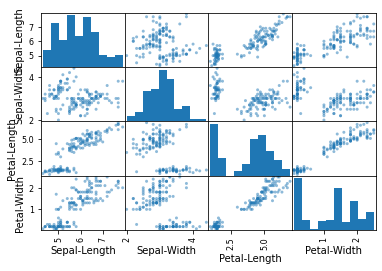

In [15]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [16]:
# creating a validation dataset
# splitting dataset
array = dataset.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size=0.2,random_state=1)

In [17]:
# Logistic Regression
# Linear Discriminant Analysis
# K- nearest neighbours
# Classification and Regression Tress
# Gaussian Naive Bayes
# Support Vector Machines

#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [18]:
#evaluate the created models
results = []
names=[]
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results= cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.950000 (0.055277)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


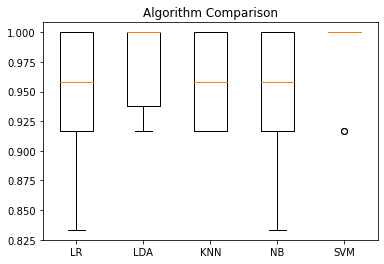

In [19]:
# compare our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [20]:
# make prediction on svm
model=  SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)

In [21]:
# evaluate our predictions
print(accuracy_score(y_validation,predictions))
print(confusion_matrix(y_validation,predictions))
print(classification_report(y_validation, predictions))


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

